In [1]:
#data analysis
import pandas as pd
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv", low_memory=False)
test_data = pd.read_csv("test.csv", low_memory=False)
#changing the Transported columns to numerical
tt = df["Transported"].values.astype(object).astype(int)
df["Transported"] = tt
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [11]:
combine = [df, test_data]

In [21]:
#fill missing values with median
def prepare(df):
    for label, contents in df.items():
        if pd.api.types.is_numeric_dtype(contents):
            if pd.isnull(contents).sum():
            
            #add a binary column which tells us what data is missing
#             catd[label+"is_missing"] = pd.isnull(contents)
            #fill missing numeric values with median
                df[label] = contents.fillna(contents.median())
    for label, contents in df.items():
        if not pd.api.types.is_numeric_dtype(contents):
            df[label] = pd.Categorical(contents).codes+1
            
prepare(df)

In [25]:
prepare(test_data)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,1,2,2785,3,27.0,1,0.0,0.0,0.0,0.0,0.0,2913
1,2,1,1,1868,3,19.0,1,0.0,9.0,0.0,2823.0,0.0,2407
2,3,2,2,258,1,31.0,1,0.0,0.0,0.0,0.0,0.0,3377
3,4,2,1,260,3,38.0,1,0.0,6652.0,0.0,181.0,585.0,2712
4,5,1,1,1941,3,20.0,1,10.0,0.0,635.0,0.0,0.0,669


In [26]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1,2,1,150,3,39.0,1,0.0,0.0,0.0,0.0,0.0,5253,0
1,2,1,1,2185,3,24.0,1,109.0,9.0,25.0,549.0,44.0,4503,1
2,3,2,1,2,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,458,0
3,4,2,1,2,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,7150,0
4,5,1,1,2187,3,16.0,1,303.0,70.0,151.0,565.0,2.0,8320,1


In [28]:
X = df.drop("Transported", axis=1)
y = df.Transported

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6954, 13), (1739, 13), (6954,), (1739,))

In [57]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

clf = RandomForestClassifier(n_estimators=100)

fitted = clf.fit(X_train, y_train)

model_score = clf.score(X_test, y_test)
model_score * 100

78.49338700402531

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

In [59]:
models = {"LinearSVC": LinearSVC(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier}
np.random.seed(42)
results = {}
for model_name, model in models.items():
    clf.fit(X_train, y_train)
    results[model_name] = clf.score(X_test, y_test)

results

{'LinearSVC': 0.7849338700402531,
 'SVC': 0.7745830937320299,
 'LogisticRegression': 0.7843588269120184,
 'RandomForestClassifier': 0.7889591719378953}

In [60]:
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["accuracy"])
results_df

,accuracy
LinearSVC,0.784934
SVC,0.774583
LogisticRegression,0.784359
RandomForestClassifier,0.788959


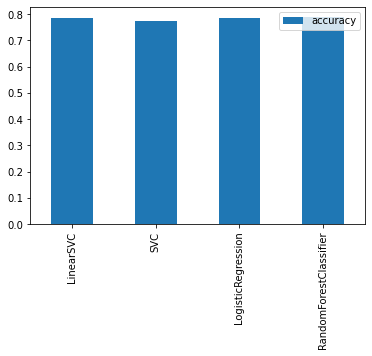

In [61]:
results_df.plot(kind='bar');

In [64]:
clf.score(X_test, y_test)*100

78.89591719378953

In [65]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, ..., 0, 1, 0])

In [85]:
test_preds = clf.predict(test_data)
test_preds

array([1, 0, 1, ..., 1, 1, 1])

In [90]:
sub = pd.read_csv("test.csv", low_memory=False)
sub = sub.PassengerId

In [91]:
sub.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [93]:
sub

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [96]:
New_dataframe = pd.DataFrame({"PassengerId":sub, "Transported":test_preds,})
New_dataframe.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [98]:
df_preds = New_dataframe["Transported"].values.astype(int).astype(bool)
df_preds

array([ True, False,  True, ...,  True,  True,  True])

In [100]:
New_dataframe = pd.DataFrame({"PassengerId":sub, "Transported":df_preds,})
New_dataframe.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [102]:
New_dataframe.to_csv("sample_submission.csv", index=False)